# Import dependdencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# Data collection and analysis

In [2]:
#loading the data from csv file to a pandas df
customer_data=pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# shape of the dataset
customer_data.shape

(200, 5)

In [4]:
# getting some insides of the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

  Choosing the Annual Income column and spending score column

In [6]:
X=customer_data.iloc[:,[3,4]].values

In [7]:
#print(X)

Choosing the number of clusters using WCSS --> Within cluster sum of square

In [8]:
# elbow method
wcss=[]
for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  

c:\Users\Deepak sirohiwal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


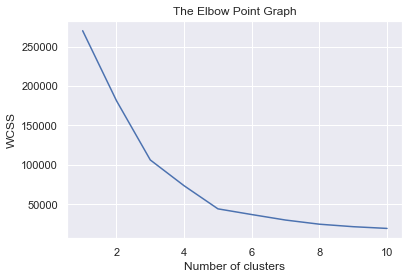

In [9]:
# plot an elbow graph to find which k value for the cluster to select
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of clusters = 5

Training the K-means clsutering model

In [10]:
k=5
kmeans= KMeans(n_clusters=k, init='k-means++', random_state=0)
# return a label for each data points
y=kmeans.fit_predict(X)

print(y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

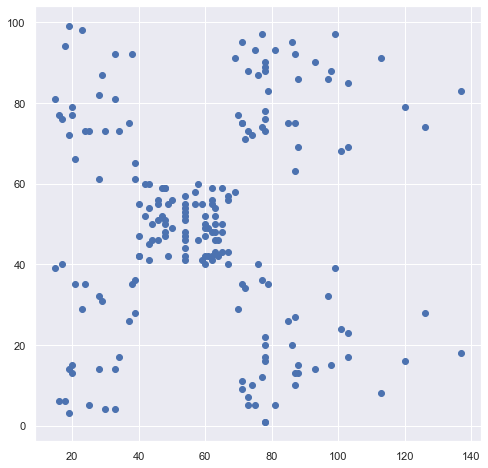

In [11]:
# Plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])

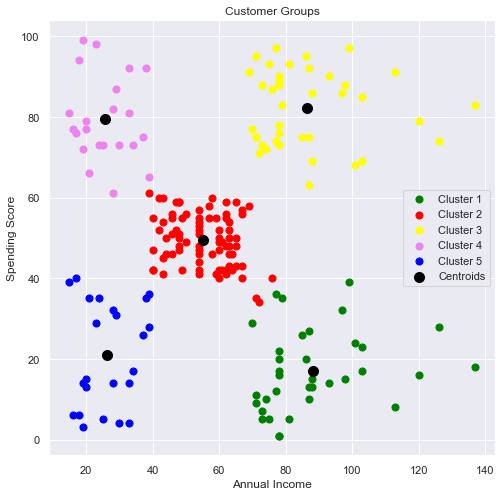

In [17]:

plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1], s=50, c='green', label='Cluster 1') # X[y==0,0] means all the points(X -axis) that belongs to the 1st cluster and similarly X[y==0,1] all the points (Y-axis) belongs t 1st cluster
plt.scatter(X[y==1,0],X[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2,0],X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0],X[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y==4,0],X[y==4,1], s=50, c='blue', label='Cluster 5')


#plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()
plt.show()

Conclutions:
1. There are set of groups (Cluster 1) which have heigh Annual Income but they spend less on the Shopping and Cluster 4 are those set of group who have less Anual Income but spend more on the Shopping.